Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
Epoch 0 - loss: 48.16359329223633
Epoch 1 - loss: 1.0173128843307495
Epoch 2 - loss: 88.83402252197266
Epoch 3 - loss: 1.685847282409668
Epoch 4 - loss: 89.11278533935547
Epoch 5 - loss: 1.635256290435791
Epoch 6 - loss: 88.66230010986328
Epoch 7 - loss: 1.5735151767730713
Epoch 8 - loss: 88.20365142822266
Epoch 9 - loss: 1.5130443572998047
Epoch 10 - loss: 87.74807739257812
Epoch 11 - loss: 1.4540135860443115
Epoch 12 - loss: 87.29572296142578
Epoch 13 - loss: 1.396427869796753
Epoch 14 - loss: 86.84661102294922
Epoch 15 - loss: 1.3402595520019531
Epoch 16 - loss: 86.40071105957031
Epoch 17 - loss: 1.2854949235916138
Epoch 18 - loss: 85.95800018310547
Epoch 19 - loss: 1.232109785079956
Epoch 20 - loss: 85.51839447021484
Epoch 21 - loss: 1.180097222328186
Epoch 22 - loss: 85.08194732666016
Epoch 23 - loss: 1.129433274269104
Epoch 24 - loss: 84.6485977172851

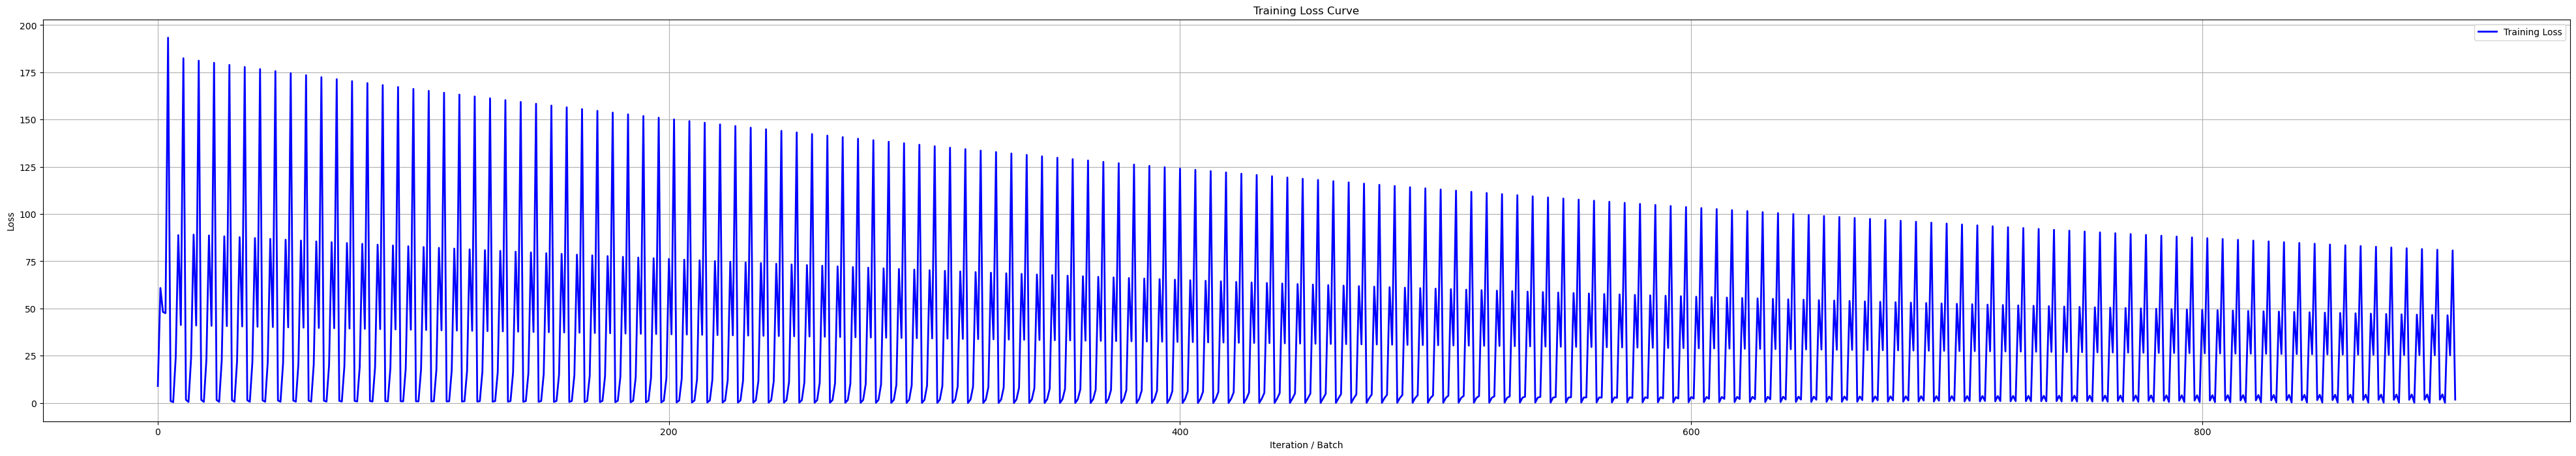

In [13]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


#data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
#target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)
data = [[1.,3.], [2.,6.], [3.,9.]]
label = [[1.],[5.],[13.]]
hist = []

############## Batch GD based update ##############       
      
for epoch in range(300):   
    for X, Y in zip(data, label):
        X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        hist.append(loss.detach())
        optimizer.step()
    print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for current_data in data:
    X = torch.FloatTensor([current_data])
    out = net(X)
    print(f"when x = {current_data}, y = {out.detach().squeeze().item()}")

#plt.plot(hist, label="training curve")
plt.figure(figsize=(50, 8))  # Bigger figure: width=12, height=8
plt.plot(hist, label="Training Loss", color='b', linewidth=2)
plt.xlabel("Iteration / Batch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.legend()